### lecture 14 : 인공지능의 종류와 선형회기 by 사이킷런

In [7]:
# 결석한 친구의 몸무게를 예측하는 션형회기 모델

from sklearn import linear_model as lm

regression = lm.LinearRegression() # 선형 회기 생성
X = [[164],[179],[162],[170]] # 받드시 2차원 배열
y = [53,63,55,59]
regression.fit(X,y) # 선형회기 모델을 생성하는 함수

score = regression.score(X,y)
a = regression.coef_
b = regression.intercept_

print("y = ", a, "x + ", b)
print("wegith: ", score) # 모델의 점수를 나타낸다.

input_data = [[180],[185]]
result = regression.predict(input_data)

print('예상되는 몸무게:', result)

y =  [0.55221745] x +  -35.686695278969935
wegith:  0.9032031231056471
예상되는 몸무게: [63.71244635 66.47353362]


[54.8769671  63.1602289  53.77253219 58.19027182]


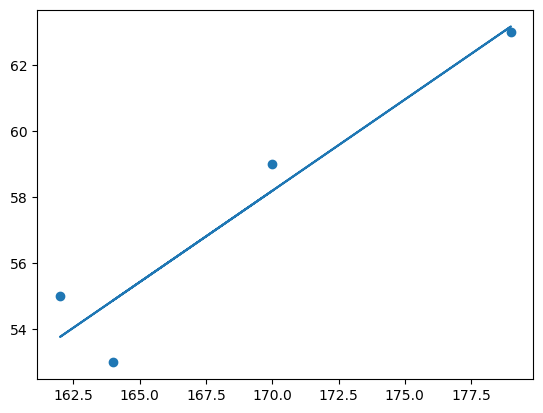

In [9]:
# 위 코드의 데이터 셋과 선형회기 시각화

import matplotlib.pyplot as plt
from sklearn import linear_model as lm

regression = lm.LinearRegression()

X = [[164], [179], [162], [170]]
y = [53, 63, 55, 59]

regression.fit(X, y)
score = regression.score(X, y)
a = regression.coef_
b = regression.intercept_

results = regression.predict(X)
print(results)

plt.scatter(X, y)
plt.plot(X, results)
plt.show()


coef:  [ 0.88542825 -8.87235818] intercept:  -90.97330367074525 score:  0.7404546306026772
Enugi's weight:  [47.13542825]
Dongmin's weight:  [56.00778643]


RuntimeError: matplotlib does not support generators as input

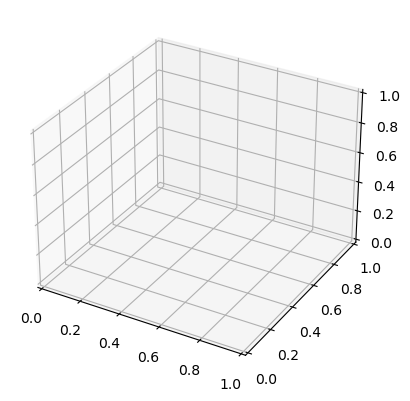

In [32]:


import sklearn.linear_model as lm
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

X = [[164, 1], [167, 1], [165, 0], [170, 0], [179, 0], [163, 1], [159, 0], [166, 1]]
y = [43, 48, 47, 66, 67, 50, 52, 44]

regr = lm.LinearRegression() # new creation

regr.fit(X, y)

a = regr.coef_
b = regr.intercept_

print("coef: ", a, "intercept: ", b, "score: ", regr.score(X, y))

eungi = regr.predict([[166, 1]])
dongmin = regr.predict([[166, 0]])

print("Enugi's weight: ", eungi)
print("Dongmin's weight: ", dongmin)

h_list = []
h_list.append(i[0] for i in X)
sex_list = []
sex_list.append(i[1] for i in X)

fig = plt.figure()
ax = fig.add_subplot( projection='3d')
ax.scatter(h_list, y,sex_list, color = 'r', alpha = 0.5)

plt.plot(X, regr.predict(X))
plt.show()

In [12]:
# 당뇨병 예제

import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
import sklearn.datasets as ds

diabetes = ds.load_diabetes()

In [13]:
# 데이타 출력
print("Shape of diabetes.data: ", diabetes.data.shape)
print("######### raw data ########")
print(diabetes.data) # 442행 10열 을 출력한다.

Shape of diabetes.data:  (442, 10)
######### raw data ########
[[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990842
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06832974
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286377
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04687948
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452837
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00421986
   0.00306441]]


In [14]:
#데이터세의 피쳐들을 출력
print("########## features ########")
print(diabetes.feature_names)

########## features ########
['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [16]:
#
print("########### shape ##########")
print(diabetes.target.shape)
print(diabetes.target)

########### shape ##########
(442,)
[151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 160. 178.
  48. 270. 202. 111.  85.  42. 170. 200. 252. 113. 143.  51.  52. 210.
  65. 141.  55. 134.  42. 111.  98. 164.  48.  96.  90. 162. 150. 279.
  92.  83. 128. 102. 302. 198.  95.  53. 134. 144. 232.  81. 104.  59.
 246. 297. 258. 229. 275. 281. 179. 200. 200. 173. 180.  84. 121. 161.
  99. 109. 115. 268. 274. 158. 107.  83. 103. 272.  85. 280. 336. 281.
 118. 317. 235.  60. 174. 259. 178. 128.  96. 126. 288.  88. 292.  71.
 197. 186.  25.  84.  96. 195.  53. 217. 172. 131. 214.  59.  70. 220.
 268. 152.  47.  74. 295. 101. 151. 127. 237. 225.  81. 151. 107.  64.
 138. 185. 265. 101. 137. 143. 141.  79. 

In [5]:
from sklearn.datasets import load_iris

iris = load_iris()
print(iris.data)
print(iris.data.shape)
print(iris.feature_names)
print(iris.target)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [6]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size = 0.2)

In [12]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import sklearn.metrics as met


iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size = 0.2)

num_neigh = 1
knn = KNeighborsClassifier(n_neighbors = num_neigh)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

scores = met.accuracy_score(y_test, y_pred)
print('# of neighbors:', num_neigh)
print('Accuracy:', scores)

# of neighbors: 1
Accuracy: 0.9333333333333333


c:\Users\box15\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [13]:
from sklearn.datasets import load_iris
# from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import sklearn.metrics as met


iris = load_iris()
num_neigh = 1
knn = KNeighborsClassifier(n_neighbors = num_neigh)
knn.fit(iris.data, iris.target)

classes = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}

X = [[3, 4, 5, 2], [5, 4, 2, 2]]
y = knn.predict(X)

print(y)
print(classes[y[0]])
print(classes[y[1]])

[2 0]
virginica
setosa


c:\Users\box15\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


# of neighbors: 5
Accuracy: 0.9666666666666667
[[13  0  0]
 [ 0  7  1]
 [ 0  0  9]]


c:\Users\box15\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


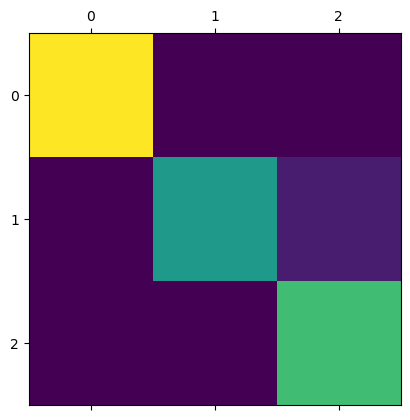

In [16]:
import matplotlib.pyplot as plt
#데이타 시각화
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size = 0.2)

num_neigh = 5
knn = KNeighborsClassifier(n_neighbors = num_neigh)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

scores = metrics.accuracy_score(y_test, y_pred)
print('# of neighbors:', num_neigh)
print('Accuracy:', scores)

# 시각화
confusion = metrics.confusion_matrix(y_test, y_pred)
print(confusion)
plt.matshow(confusion)
plt.show()

In [18]:
import pandas as pd

dp = pd.read_csv('./data/Life_expectancy.csv')
print(dp.shape)
dp.head()

(2938, 22)


,Country,Year,Status,Life expectancy,Adult mortality,Infant deaths,Alcohol,Percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [19]:
life = dp[['Life expectancy', 'Year', 'Alcohol', 'Percentage expenditure', 'Total expenditure', 'Hepatitis B', 'Measles', 'Polio', 'BMI', 'GDP', 'Thinness 1-19 years', 'Thinness 5-9 years']]
# 원하는 열만 골라서 새로운 데이타 프레임 생성하기

In [20]:
life.isna().sum()

Life expectancy            10
Year                        0
Alcohol                   194
Percentage expenditure      0
Total expenditure         226
Hepatitis B               553
Measles                     0
Polio                      19
BMI                        34
GDP                       448
Thinness 1-19 years        34
Thinness 5-9 years         34
dtype: int64

In [21]:
life.dropna(inplace=True)
life.shape

C:\Users\box15\AppData\Local\Temp\ipykernel_5952\3370122698.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  life.dropna(inplace=True)


(1853, 12)

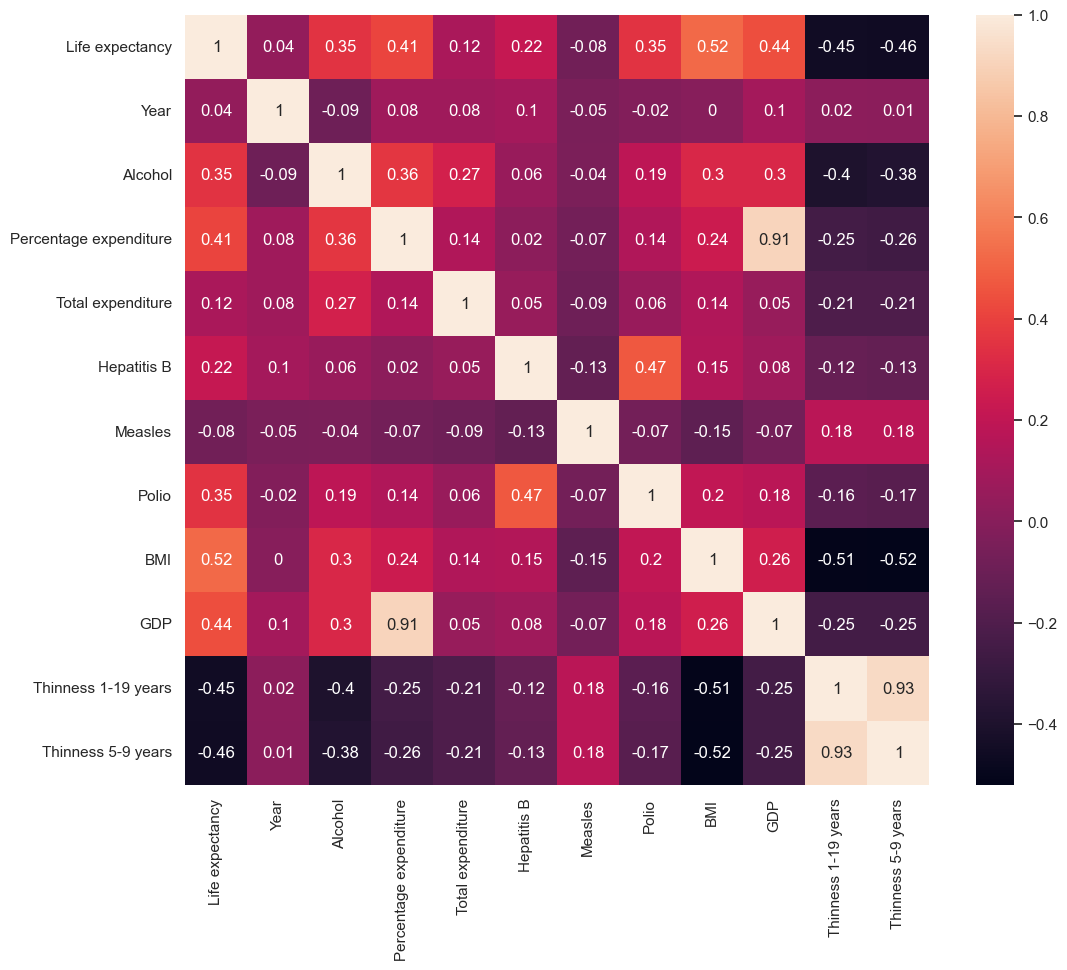

In [22]:
import seaborn as sns

sns.set(rc={'figure.figsize':(12, 10)})
corr_mat = life.corr().round(2)
sns.heatmap(data = corr_mat, annot = True)
plt.show()

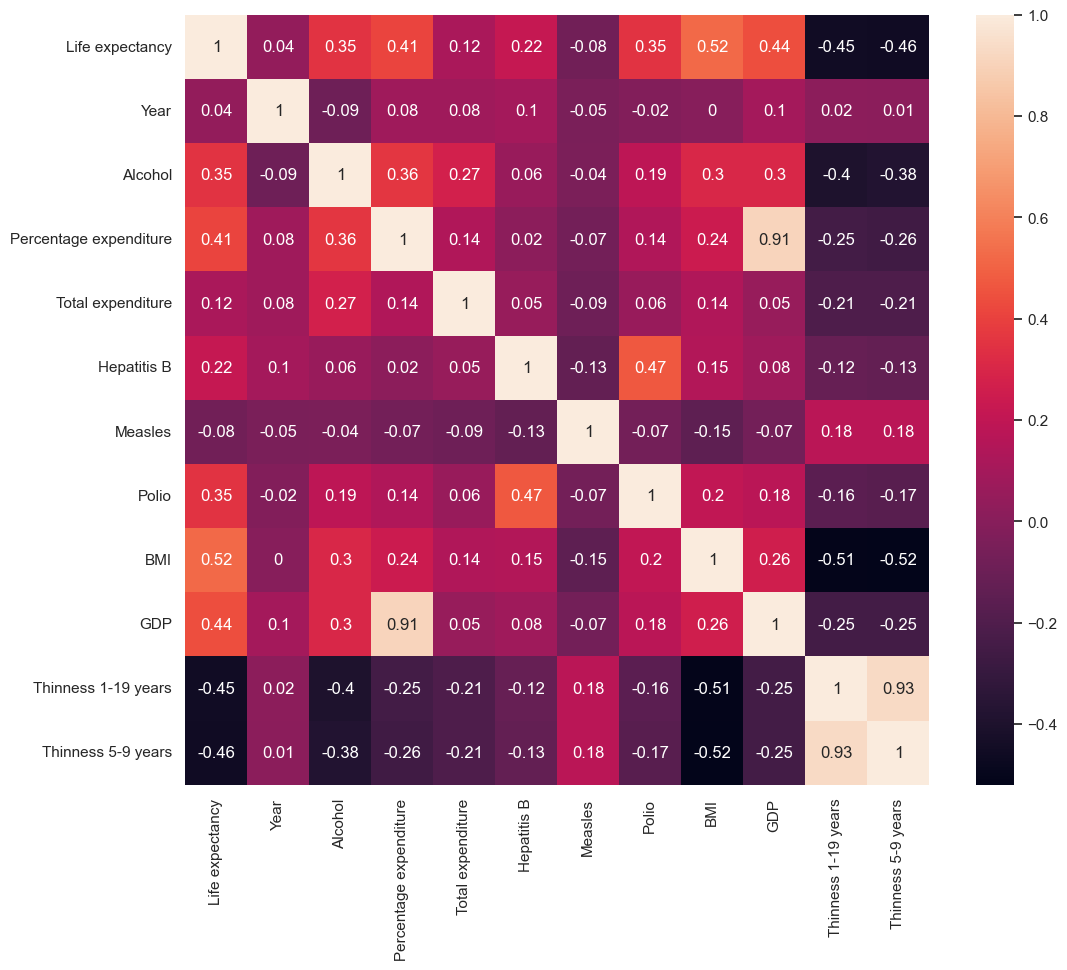

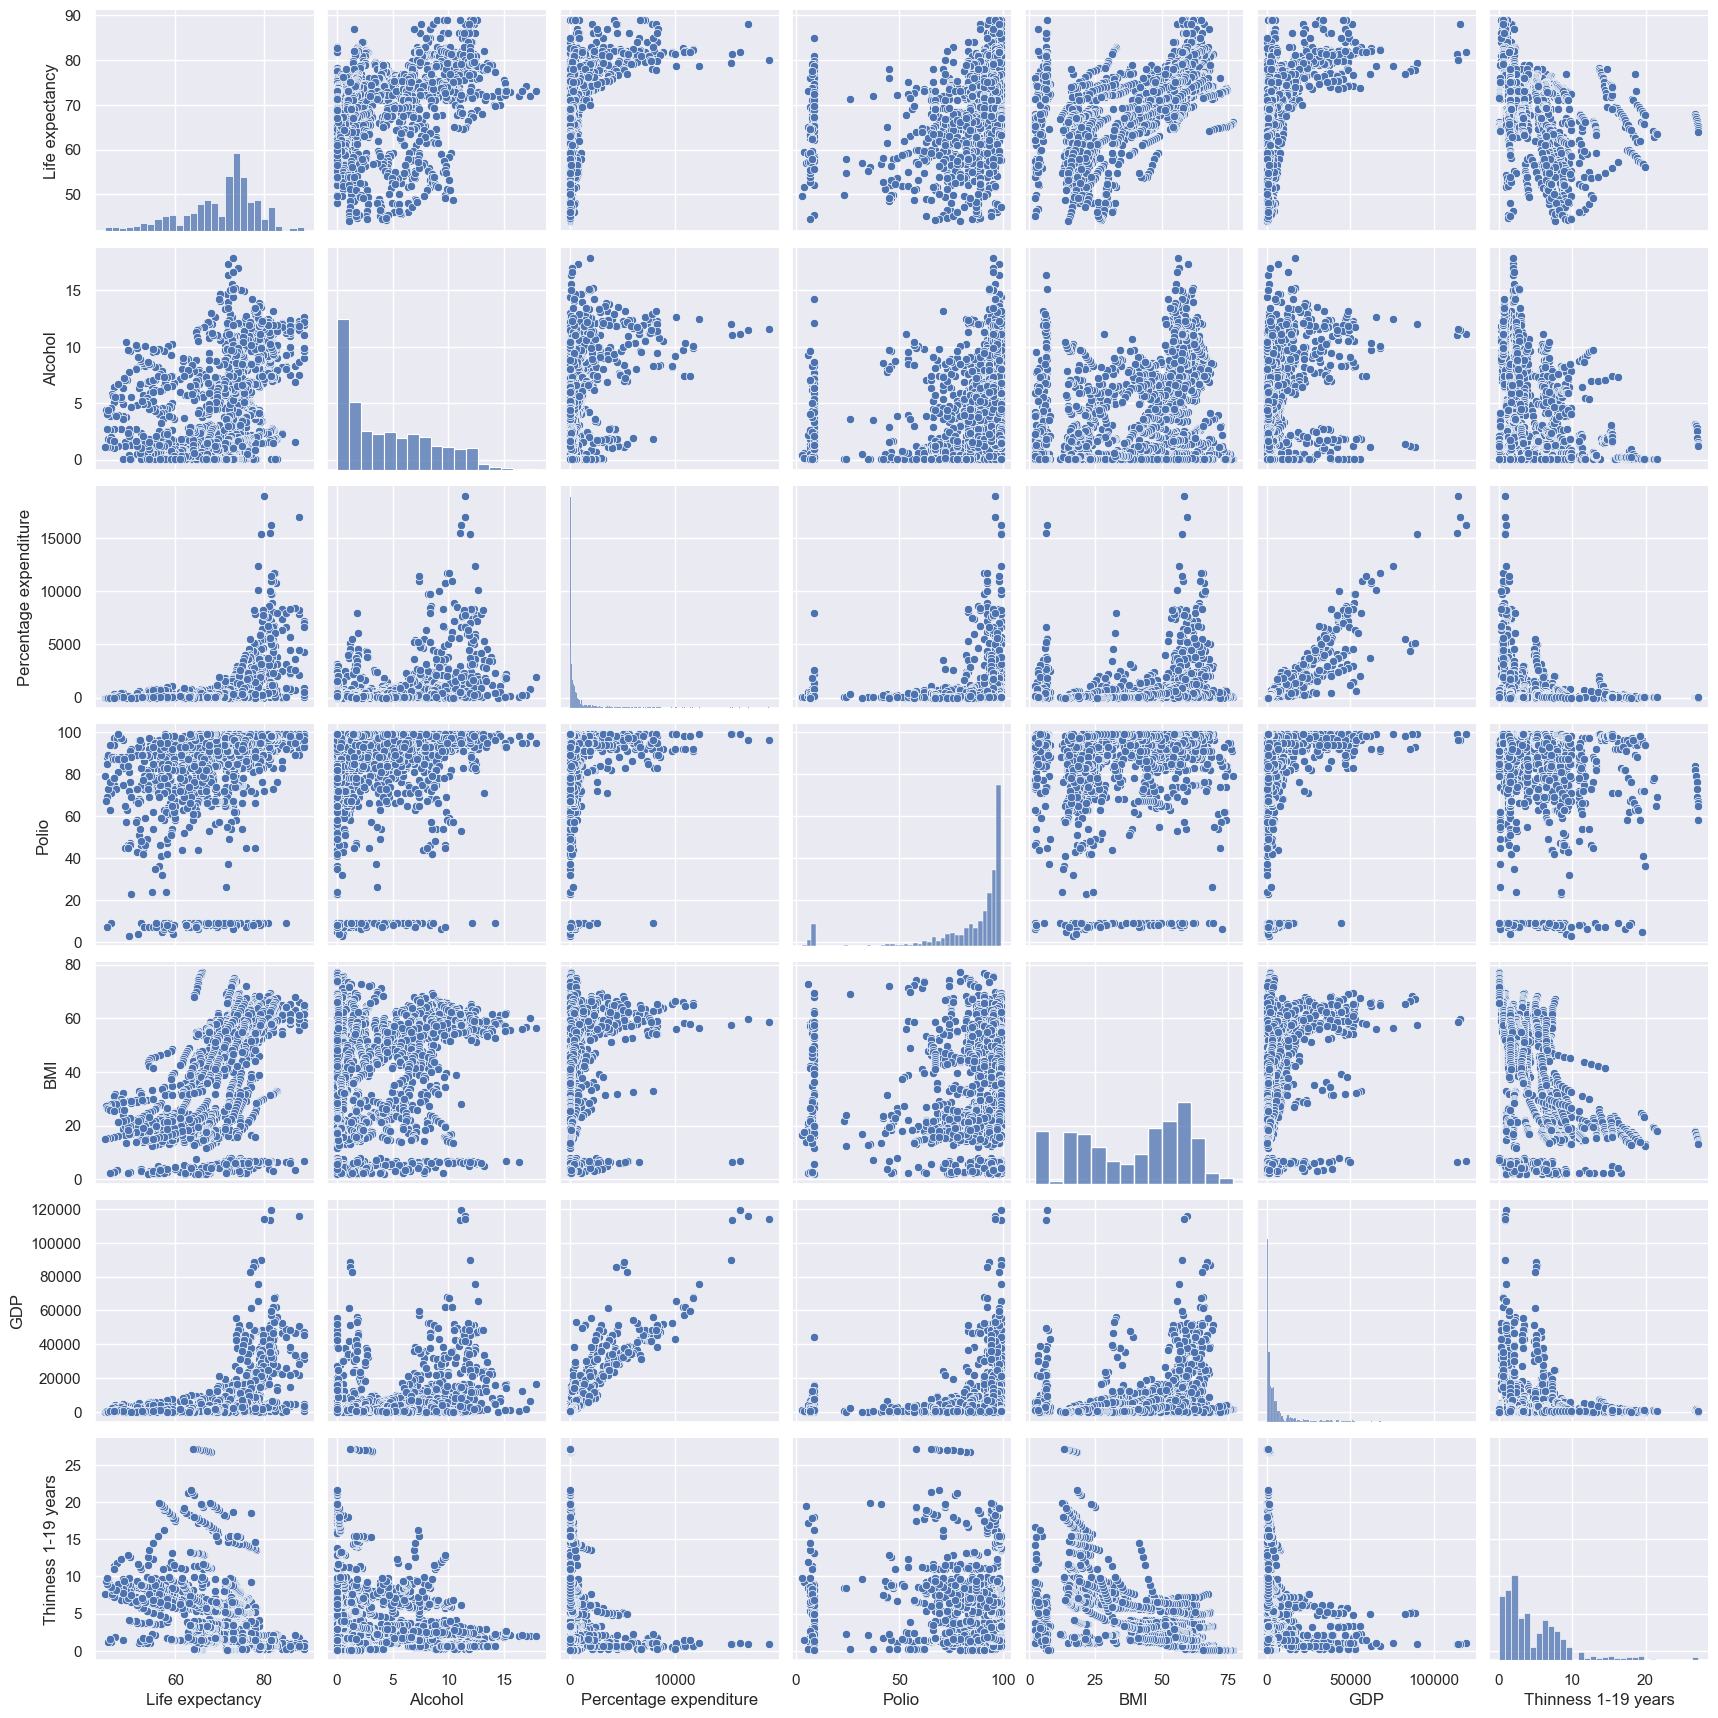

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

life = pd.read_csv('./data/life_expectancy.csv')
life = life[['Life expectancy', 'Year', 'Alcohol', 'Percentage expenditure', 'Total expenditure', 'Hepatitis B', 'Measles', 'Polio', 'BMI', 'GDP', 'Thinness 1-19 years', 'Thinness 5-9 years']]
life.dropna(inplace = True)

sns.set(rc={'figure.figsize':(12, 10)})
corr_mat = life.corr().round(2)
sns.heatmap(data = corr_mat, annot = True)
sns.pairplot(life[['Life expectancy', 'Alcohol', 'Percentage expenditure', 'Polio', 'BMI', 'GDP', 'Thinness 1-19 years']])
plt.show()

RMSE: 6.1584326236184905


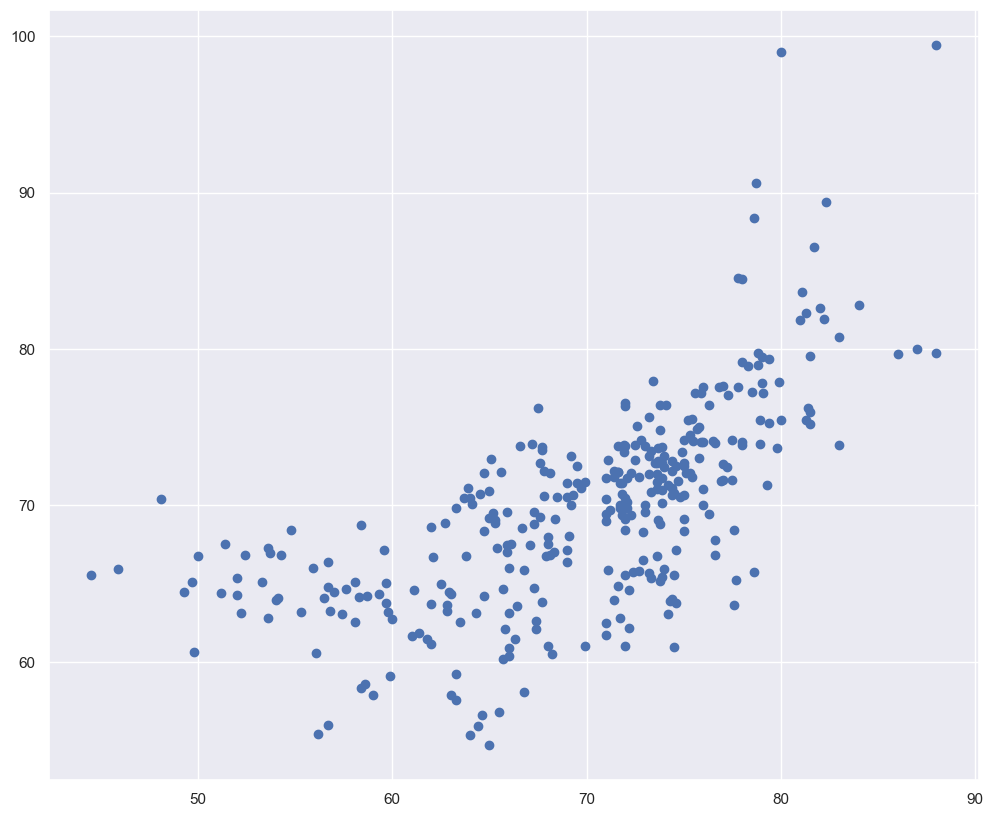

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

life = pd.read_csv('./data/life_expectancy.csv')
life.dropna(inplace = True)
X = life[['Alcohol', 'Percentage expenditure', 'Polio', 'BMI', 'GDP', 'Thinness 1-19 years']]
y = life['Life expectancy']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
regr = LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE:', rmse)
plt.scatter(y_test, y_pred)
plt.show()